[*********************100%%**********************]  1 of 1 completed


2/2 [==============================] - 1s 21ms/step
Root Mean Squared Error (RMSE): 16.126472111744857


C:\Users\Admin\AppData\Local\Temp\ipykernel_18748\1265634117.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


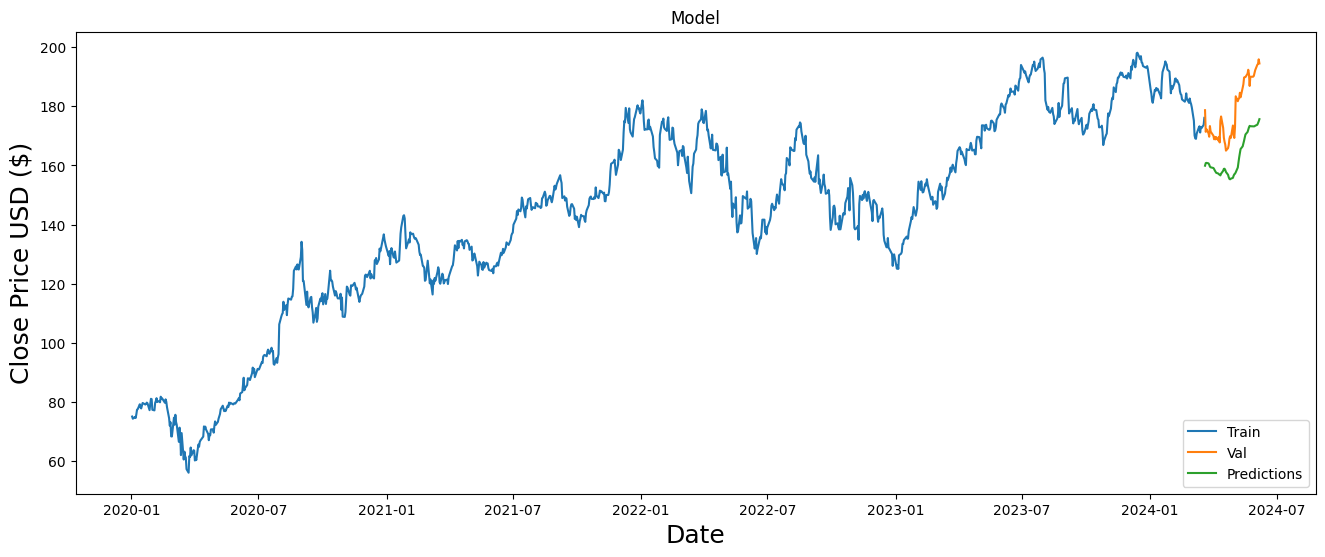

                 Close  Predictions
Date                               
2024-03-20  178.669998   159.910645
2024-03-21  171.369995   160.777466
2024-03-22  172.279999   160.866333
2024-03-25  170.850006   160.693359
2024-03-26  169.710007   160.248184
2024-03-27  173.309998   159.608337
2024-03-28  171.479996   159.364746
2024-04-01  170.029999   159.129562
2024-04-02  168.839996   158.778625
2024-04-03  169.649994   158.291901
2024-04-04  168.820007   157.898697
2024-04-05  169.580002   157.507812
2024-04-08  168.449997   157.258636
2024-04-09  169.669998   156.982864
2024-04-10  167.779999   156.870911
2024-04-11  175.039993   156.637589
2024-04-12  176.550003   157.191299
2024-04-15  172.690002   158.192642
2024-04-16  169.380005   158.841141
2024-04-17  168.000000   158.874847
2024-04-18  167.039993   158.460266
2024-04-19  165.000000   157.778931
2024-04-22  165.839996   156.835785
2024-04-23  166.899994   155.994080
2024-04-24  169.020004   155.430695
2024-04-25  169.889999   155

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
# Get the stock quote
df = yf.download('AAPL', start='2020-01-01', end=pd.to_datetime('today'))

# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("Root Mean Squared Error (RMSE):", rmse)

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)